In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
%matplotlib inline

In [2]:
# Retirar informações da página
url = "https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table"
page = requests.get(url).text
soup = BeautifulSoup(page)

lista_geral = []
body = soup.find_all('tbody')[1]
for row in body.find_all('td'):
    row = str(row.text)
    row_clean = row.strip('\xa0').strip('\n')
    lista_geral.append(row_clean)

In [3]:
# Criar listas de cada coluna (país, ouro, prata, etc)
lista_paises = lista_geral[::16]
lista_ouro = lista_geral[2::16]
lista_prata = lista_geral[3::16]
lista_bronze = lista_geral[4::16]
lista_total = lista_geral[5::16]

# Limpar nomes de países
lista_paises_limpa = []
for pais in lista_paises:
    inicio = ''
    index = 0
    tamanho = len(pais)
    for pos, letra in enumerate(pais):
        if letra == '(':
            inicio = pos
            index += (tamanho - inicio) * (-1)
        palavra_limpa = pais[0:index]
        novo_pais = palavra_limpa.strip('\xa0')
    lista_paises_limpa.append(novo_pais)
lista_paises_limpa

# Transformar 'str' em 'int' nas listas de medalhas
lista_ouro_int = []
for mudar in lista_ouro:
    mudar = mudar.replace(',','')
    mudar = int(mudar)
    lista_ouro_int.append(mudar)

lista_prata_int = []
for mudar in lista_prata:
    mudar = mudar.replace(',','')
    mudar = int(mudar)
    lista_prata_int.append(mudar)

lista_bronze_int = []
for mudar in lista_bronze:
    mudar = mudar.replace(',','')
    mudar = int(mudar)
    lista_bronze_int.append(mudar)

lista_total_int = []
for mudar in lista_total:
    mudar = mudar.replace(',','')
    mudar = int(mudar)
    lista_total_int.append(mudar)

In [4]:
# Juntar tudo numa lista de listas
lista_rank = [lista_paises_limpa, lista_ouro_int, lista_prata_int, lista_bronze_int, lista_total_int]

# Criar Data Frame
rank_df = pd.DataFrame(lista_rank).transpose()
rank_df.columns=['País', 'Ouro', 'Prata', 'Bronze', 'Total']

# Mudar países de coluna para index
rank_df.set_index('País', inplace=True)

rank_df

,Ouro,Prata,Bronze,Total
País,,,,
Afghanistan,0,0,2,2
Algeria,5,4,8,17
Argentina,21,26,30,77
Armenia,2,8,8,18
Australasia,3,4,5,12
...,...,...,...,...
Zambia,0,1,1,2
Zimbabwe,3,4,1,8
Independent Olympic Athletes,1,0,1,2


In [9]:
rank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Afghanistan to Mixed team
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ouro    156 non-null    object
 1   Prata   156 non-null    object
 2   Bronze  156 non-null    object
 3   Total   156 non-null    object
dtypes: object(4)
memory usage: 6.1+ KB


In [10]:
rank_df = rank_df.astype('int')
rank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Afghanistan to Mixed team
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ouro    156 non-null    int32
 1   Prata   156 non-null    int32
 2   Bronze  156 non-null    int32
 3   Total   156 non-null    int32
dtypes: int32(4)
memory usage: 3.7+ KB


In [12]:
rank_df.describe()

,Ouro,Prata,Bronze,Total
count,156.000000,156.000000,156.000000,156.000000
mean,35.000000,34.801282,37.769231,107.570513
std,102.473033,86.042557,83.159299,269.810378
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,3.000000
50%,3.000000,5.000000,6.000000,13.500000
75%,24.500000,29.250000,31.250000,85.750000
max,1061.000000,830.000000,738.000000,2629.000000


In [13]:
rank_df.isnull().sum()

Ouro      0
Prata     0
Bronze    0
Total     0
dtype: int64

In [7]:
rank_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Afghanistan to Mixed team
Columns: 4 entries, Ouro to Total
dtypes: object(4)
memory usage: 6.1+ KB


In [14]:
rank_df.sort_values(by=['Total'], axis=0, ascending=True, inplace=True)
rank_df.tail(10)

,Ouro,Prata,Bronze,Total
País,,,,
Sweden,147,177,179,503
Hungary,181,154,176,511
Australia,164,173,210,547
Italy,217,188,213,618
China,263,199,174,636
Germany,201,207,247,655
France,223,251,277,751
Great Britain,284,318,314,916
Soviet Union,395,319,296,1010


In [16]:
# Criar novo DF contendo apenas 'Total' e os 10 maiores vencedores
top_df = rank_df['Total'].tail(10)

top_df.dtypes

dtype('int32')

In [17]:
top_df.describe()

count      10.000000
mean      877.600000
std       637.857908
min       503.000000
25%       564.750000
50%       645.500000
75%       874.750000
max      2629.000000
Name: Total, dtype: float64

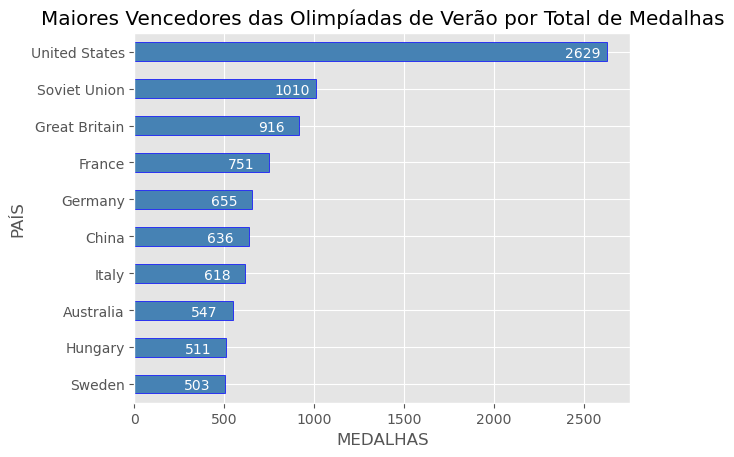

In [18]:
# Plotar bar chart de 'top_df'
top_df.plot(kind='barh', color='steelblue', edgecolor='blue')

plt.title('Maiores Vencedores das Olimpíadas de Verão por Total de Medalhas')
plt.ylabel('PAÍS')
plt.xlabel('MEDALHAS')

for index, value in enumerate(top_df):
    plt.annotate(value, xy=(value - 230, index - 0.15), color='white')

In [12]:
rank_df.loc[['Brazil']]

,Ouro,Prata,Bronze,Total
País,,,,
Brazil,37,42,71,150


In [13]:
mids = rank_df.query('Total > 121 & Total < 200')
mids

,Ouro,Prata,Bronze,Total
País,,,,
New Zealand,53,33,51,137
Ukraine,35,36,68,139
Czechoslovakia,49,49,45,143
Brazil,37,42,71,150
Belgium,44,56,57,157
Norway,61,52,50,163
Spain,48,72,49,169


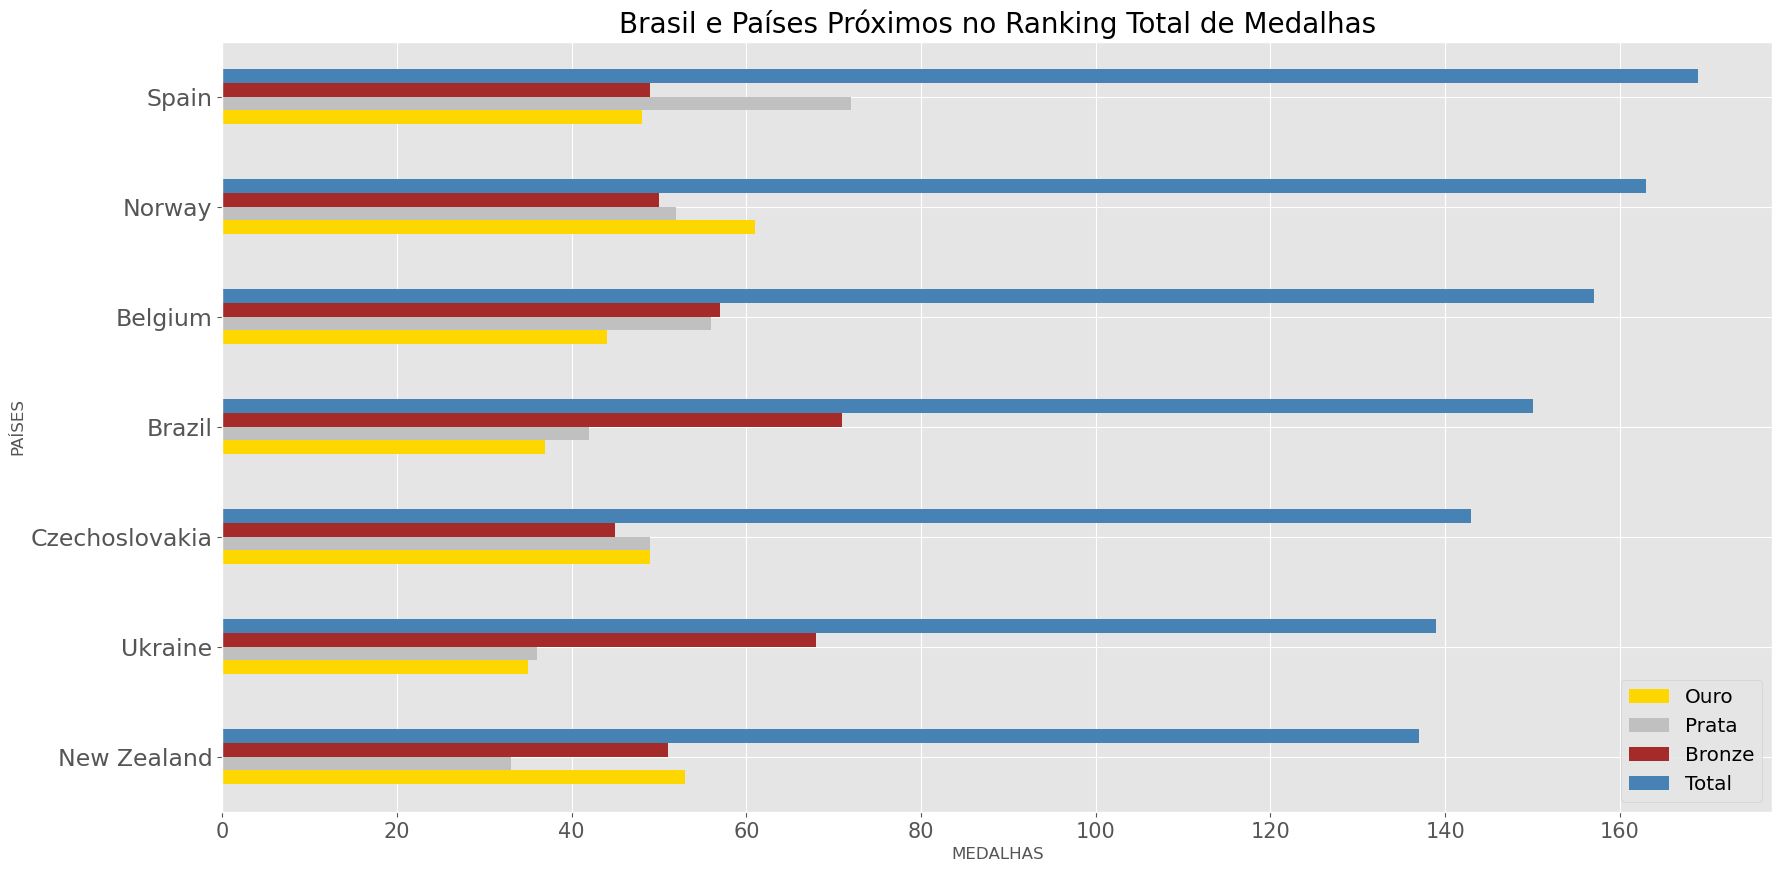

In [41]:
mids.plot(kind='barh', color=['gold', 'silver', 'brown', 'steelblue'], figsize=(20, 10))
plt.title('Brasil e Países Próximos no Ranking Total de Medalhas', size=20)
plt.xticks(size=15)
plt.xlabel('MEDALHAS')
plt.yticks(size=17)
plt.ylabel('PAÍSES')
plt.legend(fontsize='x-large')

In [28]:
# Juntar países da ex-USSR num novo DF
ussr_df = rank_df.loc[['Belarus', 'Armenia', 'Azerbaijan', 'Kazakhstan', 'Estonia', 'Georgia', 'Latvia', 'Lithuania', 
                       'Moldova', 'Kyrgyzstan', 'Russia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']]

# Alterar type para int
ussr_df = ussr_df.astype('int')

In [29]:
ussr_df

,Ouro,Prata,Bronze,Total
País,,,,
Belarus,13,30,42,85
Armenia,2,8,8,18
Azerbaijan,7,14,28,49
Kazakhstan,14,22,35,71
Estonia,10,9,17,36
Georgia,10,12,18,40
Latvia,4,11,6,21
Lithuania,6,7,13,26
Moldova,0,2,4,6


In [30]:
# Criar uma 'series' com os totais de medalhas de ex-USSR
total = ussr_df.sum()
total

Ouro      259
Prata     288
Bronze    416
Total     963
dtype: int64

In [31]:
# Novo DF 'comp_df' para juntar e comparar os 15 países a União Soviética
comp_df = rank_df.loc[['Soviet Union']].transpose()

comp_df['15 Nations of the ex-USSR'] = total

comp_df.transpose()

,Ouro,Prata,Bronze,Total
País,,,,
Soviet Union,395,319,296,1010
15 Nations of the ex-USSR,259,288,416,963


Text(0, 0.5, 'Número de Medalhas')

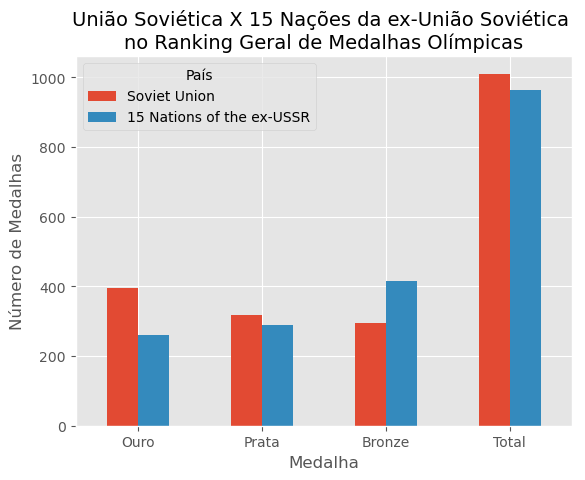

In [40]:
comp_df.plot(kind='bar')
plt.title('União Soviética X 15 Nações da ex-União Soviética \nno Ranking Geral de Medalhas Olímpicas', size=14)
plt.xticks(rotation=0)
plt.xlabel('Medalha', size=12)
plt.ylabel('Número de Medalhas')